In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('data.csv')

label_counts = df['Traffic Subtype'].value_counts()
valid_labels = label_counts[label_counts > 10000].index  # Keep labels with at least 10000 samples
df_filtered = df[df['Traffic Subtype'].isin(valid_labels)]
df_sampled = df_filtered.sample(frac=0.005, random_state=42)  # Sample 0.5%
df_dropped = df[~df['Traffic Subtype'].isin(valid_labels)]  # Get records with rare labels
df = pd.concat([df_sampled, df_dropped], ignore_index=True)

In [15]:
pd.set_option("display.max_columns", None)
# Set the display option to show all rows
pd.set_option('display.max_rows', None)
display(df.head(5))
display(df.tail(5))

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.70-192.168.1.90-65079-0-6,192.168.1.70,65079.0,192.168.1.90,0,6.0,01/01/1970 10:45:16 PM,38650231.0,2.0,0.0,100.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,2.587307,0.051746,38650231.0,0.0,38650231.0,38650231.0,38650231.0,38650231.0,0.0,38650231.0,38650231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.051746,0.000000,50.0,50.0,50.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,75.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,512.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,38650231.0,0.0,38650231.0,38650231.0,Malicious,DoS,DoS ECN
1,192.168.1.70-192.168.1.90-50433-0-6,192.168.1.70,50433.0,192.168.1.90,0,6.0,01/01/1970 04:59:36 AM,53663.0,1.0,1.0,500.0,0.0,500.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,9317.406779,37.269627,53663.0,0.0,53663.0,53663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,20.0,18.634814,18.634814,0.0,500.0,333.333333,288.675135,83333.333333,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS PSH
2,192.168.1.70-192.168.1.90-51949-0-6,192.168.1.70,51949.0,192.168.1.90,0,6.0,03/01/1970 04:01:25 AM,40134.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,1245.826481,49.833059,40134.0,0.0,40134.0,40134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,24.916530,24.916530,0.0,50.0,33.333333,28.867513,833.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS ECN
3,192.168.1.70-192.168.1.90-1224-0-6,192.168.1.70,1224.0,192.168.1.90,0,6.0,01/01/1970 04:48:00 AM,24984.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,2001.280820,80.051233,24984.0,0.0,24984.0,24984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,40.025616,40.025616,0.0,50.0,33.333333,28.867513,833.333333,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS SYN
4,192.168.1.70-192.168.1.90-9575-0-6,192.168.1.70,9575.0,192.168.1.90,0,6.0,03/01/1970 04:10:33 AM,20005465.0,2.0,0.0,1000.0,0.0,500.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,49.986341,0.099973,20005465.0,0.0,20005465.0,20005465.0,20005465.0,20005465.0,0.0,20005465.0,20005465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.099973,0.000000,500.0,500.0,500.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,750.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1000.0,0.0,0.0,512.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,20005465.0,0.0,20005465.0,20005465.0,Malicious,DoS,DoS ECN


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
79028,192.168.1.70-192.168.1.90-37479-1234-17,192.168.1.70,37479.0,192.168.1.90,1234,17.0,02/01/1970 04:44:54 AM,22485411.0,2307.0,0.0,3036012.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,135021.414552,102.599859,9.750829e+03,2.943433e+03,34364.0,30.0,22485411.0,9.750829e+03,2.943433e+03,34364.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18456.0,0.0,102.599859,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1316.570438,1316.0,0.0,0.0,0.0,0.0,3036012.0,2307.0,135021.0,0.0,0.0,0.0,0.0,0.0,0.0,2306.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
79029,136.162.16.0-255.255.255.1-0-0-0,136.162.16.0,0.0,255.255.255.1,0,0.0,02/01/1970 04:45:08 AM,65027682.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138403,8.128460e+06,1.382986e+07,38099180.0,403.0,65027682.0,8.128460e+06,1.382986e+07,38099180.0,403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3586913.0,0.0,3586913.0,3586913.0,28925934.5,1.297293e+07,38099180.0,19752689.0,Benign,Video,Video UDP
79030,192.168.1.70-192.168.1.90-57042-1234-17,192.168.1.70,57042.0,192.168.1.90,1234,17.0,02/01/1970 04:45:18 AM,49795393.0,5256.0,0.0,6916896.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,138906.344207,105.551933,9.475812e+03,4.683333e+04,482563.0,0.0,49795393.0,9.475812e+03,4.683333e+04,482563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42048.0,0.0,105.551933,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1316.250381,1316.0,0.0,0.0,0.0,0.0,6916896.0,5256.0,138906.0,0.0,0.0,0.0,0.0,0.0,0.0,5255.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
79031,192.168.1.70-192.168.1.90-57890-1234-17,192.168.1.70,57890.0,192.168.1.90,1234,17.0,02/01/1970 04:46:10 AM,8809176.0,596.0,0.0,784336.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,89036.250383,67.656725,1.480534e+04,6.279618e+04,773425.0,0.0,8809176.0,1.480534e+04,6.279618e+04,773425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4768.0,0.0,67.656725,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1318.208054,1316.0,0.0,0.0,0.0,0.0,784336.0,596.0,89036.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
79032,192.168.1.70-192.168.1.90-53417-1234-17,192.168.1.70,53417.0,192.168.1.90,1234,17.0,02/01/1970 04:46:19 AM,2856556.0,477.0,0.0,627732.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,219751.336925,166.984299,6.001168e+03,3.897524e+03,25978.0,17.0,2856556.0,6.001168e+03,3.897524e+03,25978.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

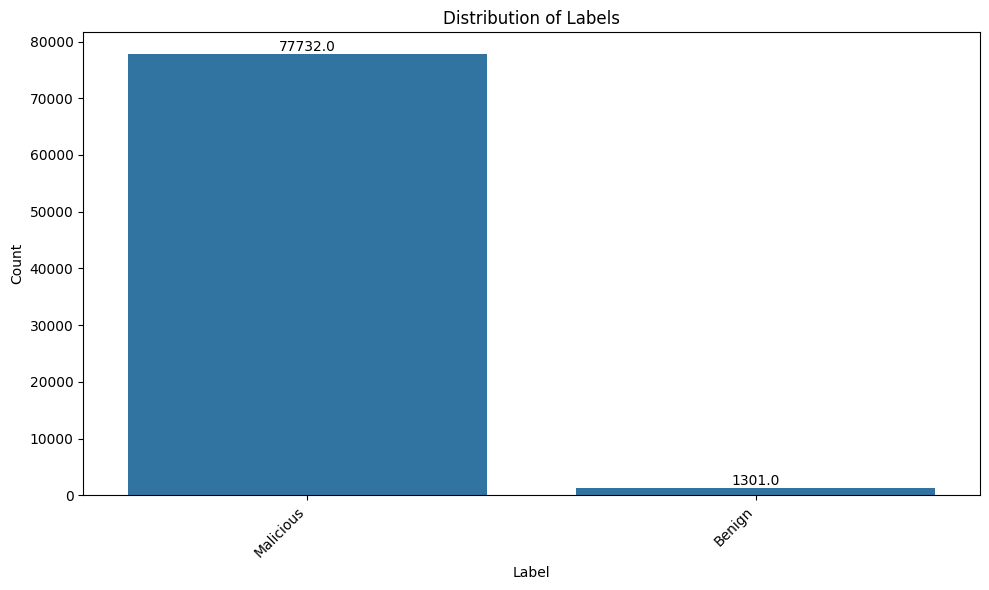

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

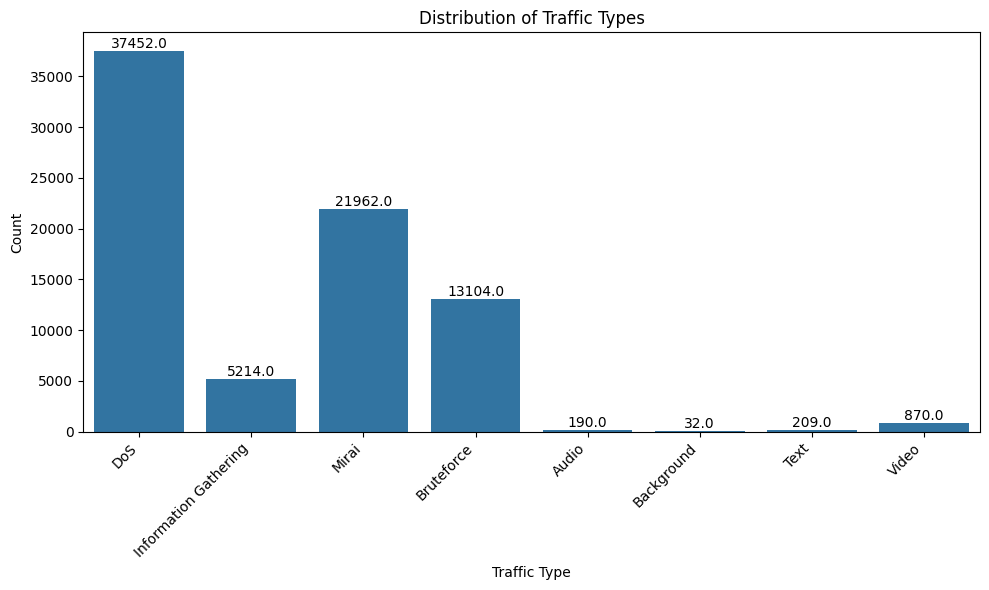

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Type', data=df)
plt.title('Distribution of Traffic Types')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

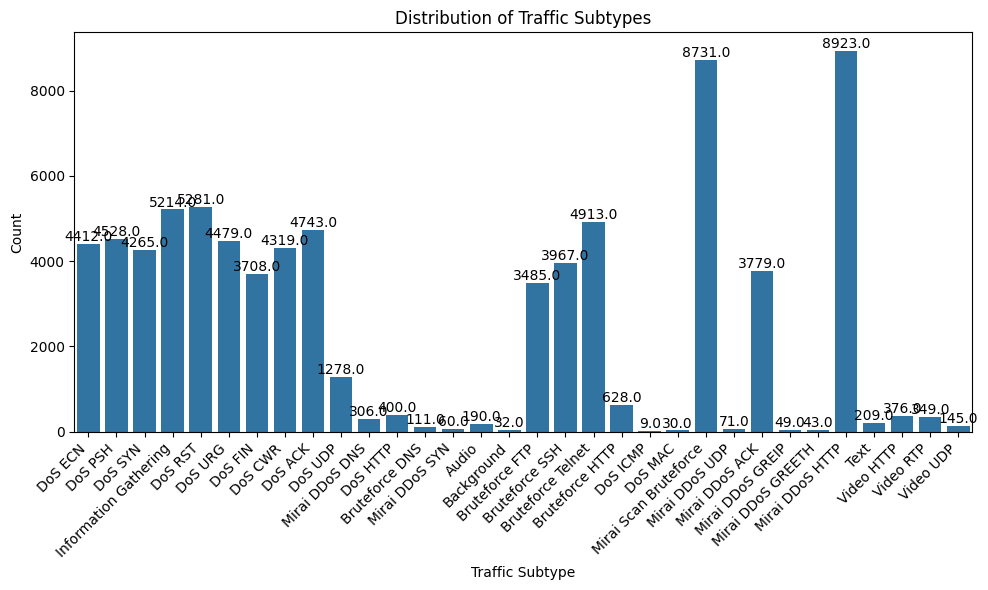

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Subtype', data=df)
plt.title('Distribution of Traffic Subtypes')
plt.xlabel('Traffic Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [19]:
TARGET_VARIABLE = 'Traffic Subtype'
DROP_COLUMNS = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp']
TARGET_TO_DROP = {'Label': ['Traffic Type', 'Traffic Subtype'],
                  'Traffic Type': ['Label', 'Traffic Subtype'],
                  'Traffic Subtype': ['Label', 'Traffic Type']}

# Drop 5-tuple collumns and timestamp
df = df.drop(columns=DROP_COLUMNS)

# Filter out duplicates within the same target
df = df.round(3)
df = df.drop_duplicates()
df = df.drop(columns=TARGET_TO_DROP[TARGET_VARIABLE])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.inspection import permutation_importance

In [21]:
# Separate features and target
X = df.drop(TARGET_VARIABLE, axis=1)
y = df[TARGET_VARIABLE]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Compute train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Identifying Numerical and Categorical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.to_list()
categorical_cols = X_train.select_dtypes(include=[object]).columns.to_list()

# Pipelines for Numerical and Categorical Data Transformations
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Column Transformer combining both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessor to train and test data
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test) 

In [22]:
# Apply SMOTE to the training data to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
# Dictionary to store the models
models = {}
hyperparameters = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},  # Baseline model with moderate complexity.
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4},  # High-complexity model
    {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1,}  # Allows full depth, minimal constraints.
]

# Loop to create and train 3 models
for i in range(3):
    # Create and train the model
    model = RandomForestClassifier(random_state=42, verbose=0, n_jobs=-1, **hyperparameters[i])
    model.fit(X_train, y_train)

    # Store the model in the dictionary with a unique name
    models[f'rdfor{i+1}'] = model

# Print confirmation
print("Models trained and stored in the 'models' dictionary.")

Models trained and stored in the 'models' dictionary.


In [25]:
# Initialize dictionaries to store the results
accuracy_ = {}
f1_ = {}
precision_ = {}
recall_ = {}
roc_auc_ = {}
confusion_matrix_ = {}
classification_reports_ = {}

# Loop through the models rdfor1, rdfor2, rdfor3
for i in range(1, 4):
    model_name = f'rdfor{i}'
    
    # Predict using the model
    y_pred = models[model_name].predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    # Handle multi-class ROC AUC calculation
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro')
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, y_pred) 
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)

In [26]:
# Evaluate rdfor1
model_name = 'rdfor1'  # Specify the model name
print("Model:", model_name)
print("Accuracy:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precision:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Confusion Matrix:\n", confusion_matrix_[model_name])
print("Classification Report:\n", classification_reports_[model_name])

Model: rdfor1
Accuracy: 0.9602552173335106
F1 Score: 0.8712063194829722
Precision: 0.8548928491953729
Recall: 0.9106539855484189
ROC AUC: 0.9988280226733829
Confusion Matrix:
 [[34  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  1  0 ... 62  0  0]
 [ 0  1  0 ...  0 68  1]
 [ 0  0  0 ...  0  1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00        22
           3       1.00      0.99      1.00       697
           4       0.99      0.99      0.99       126
           5       0.93      0.98      0.95       785
           6       1.00      0.94      0.97       974
           7       0.97      0.95      0.96       946
           8       1.00      1.00      1.00       862
           9       1.00      1.00      1.00       880
          10       0.96      1.00      0.98      

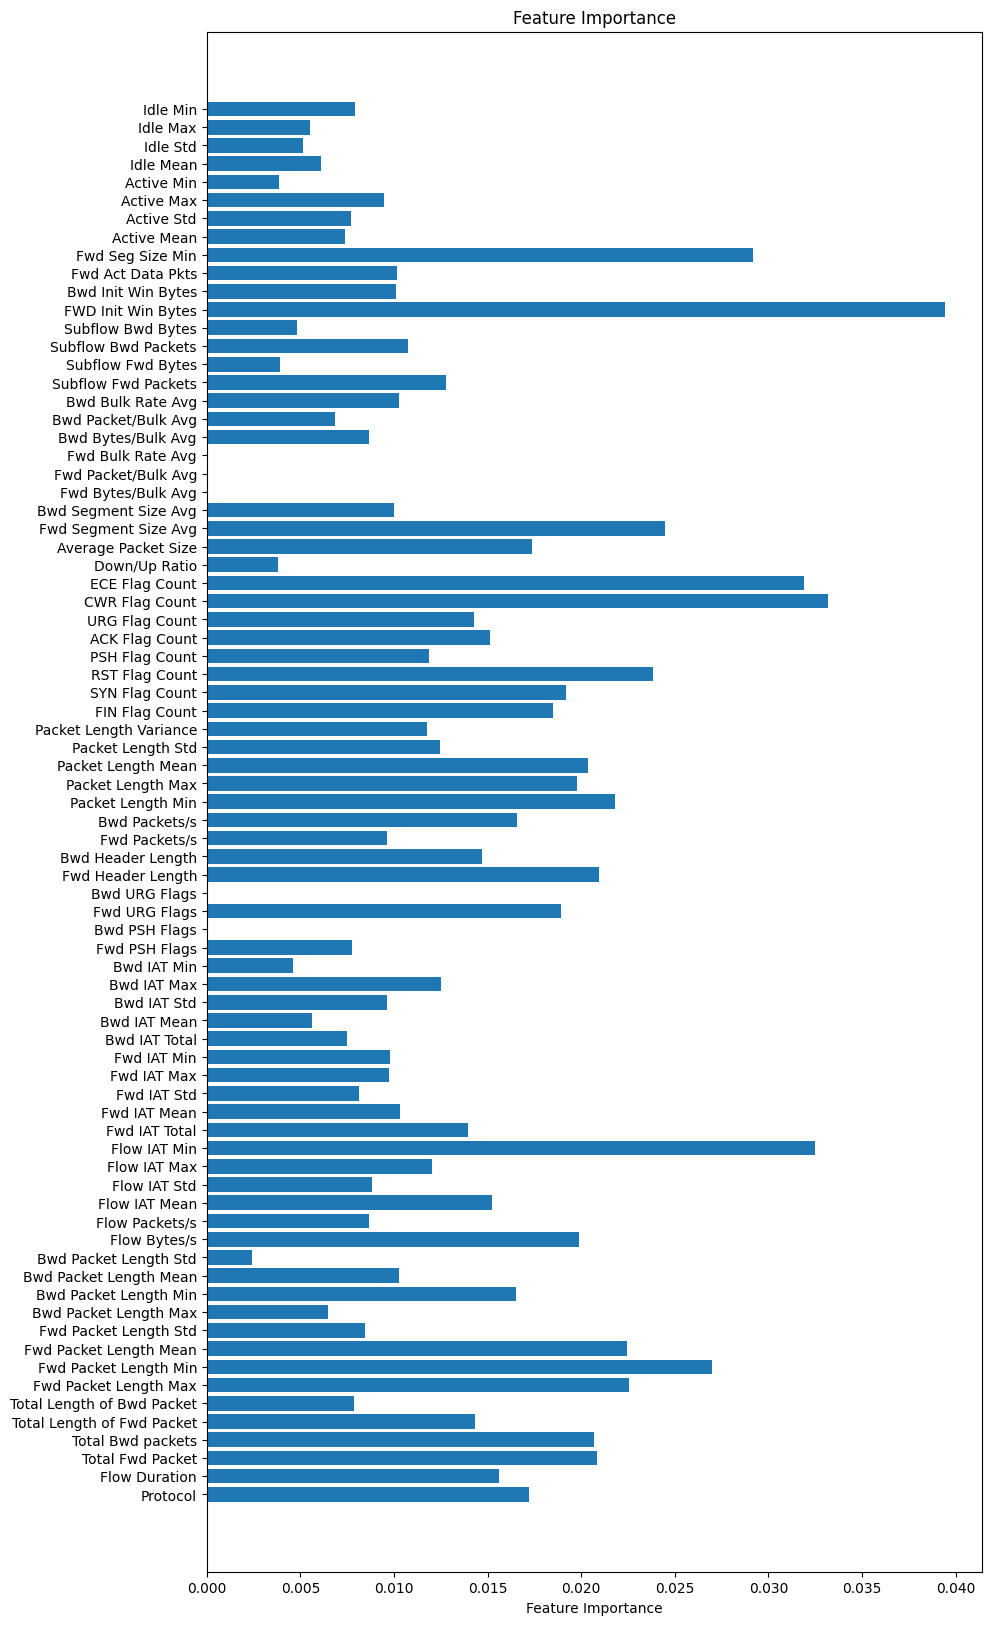

In [27]:
model_name = 'rdfor1'  # Specify the model name

plt.figure(figsize=(10, 20))

importance_rfc = models[model_name].feature_importances_
features = df.columns[:-1]

plt.barh(features, importance_rfc)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [28]:
# Streamlined hyperparameters for Logistic Regression
hyperparameters = [
    {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 10, 'class_weight': None}, # Low iterations for quick testing
    {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 100, 'class_weight': None}, # Default configuration
    {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 500, 'class_weight': None}, # High iterations for better convergence
]

# Loop to create and train models
for i in range (3):
    # Create and train the model (Logistic Regression)
    model = LogisticRegression(random_state=42, **hyperparameters[i])
    model.fit(X_train, y_train)
    
    # Store the model in the dictionary with a unique name
    models[f'logreg{i+1}'] = model

# Print confirmation
print("Models trained and stored in the 'models' dictionary.")

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Models trained and stored in the 'models' dictionary.


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Loop through the models logreg1, logreg2, logreg3, etc. (Logistic Regression models)
for i in range(1, 4):
    model_name = f'logreg{i}'
    
    # Predict using the model
    y_pred = models[model_name].predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    
    # Handle multi-class ROC AUC calculation
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(
            y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro'
        )
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1])
    
    # Store confusion matrix and classification report
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)

In [31]:
# Evaluate logreg1
model_name = 'logreg1'  # Specify the model name
print("Model:", model_name)
print("Accuracy:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precision:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Confusion Matrix:\n", confusion_matrix_[model_name])
print("Classification Report:\n", classification_reports_[model_name])

Model: logreg1
Accuracy: 0.6345872657184634
F1 Score: 0.5080309356438777
Precision: 0.5308009324827772
Recall: 0.6167677671100736
ROC AUC: 0.9472276570219945
Confusion Matrix:
 [[24  2  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  5  0 ... 12  0  0]
 [ 0  6  0 ...  0 40 17]
 [ 0  6  0 ...  0  4 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.19      1.00      0.32         6
           2       0.18      0.95      0.31        22
           3       0.85      0.99      0.91       697
           4       0.39      0.91      0.55       126
           5       0.89      0.48      0.63       785
           6       0.40      0.83      0.54       974
           7       0.51      0.20      0.29       946
           8       1.00      0.94      0.97       862
           9       1.00      0.94      0.97       880
          10       0.88      0.75      0.81     

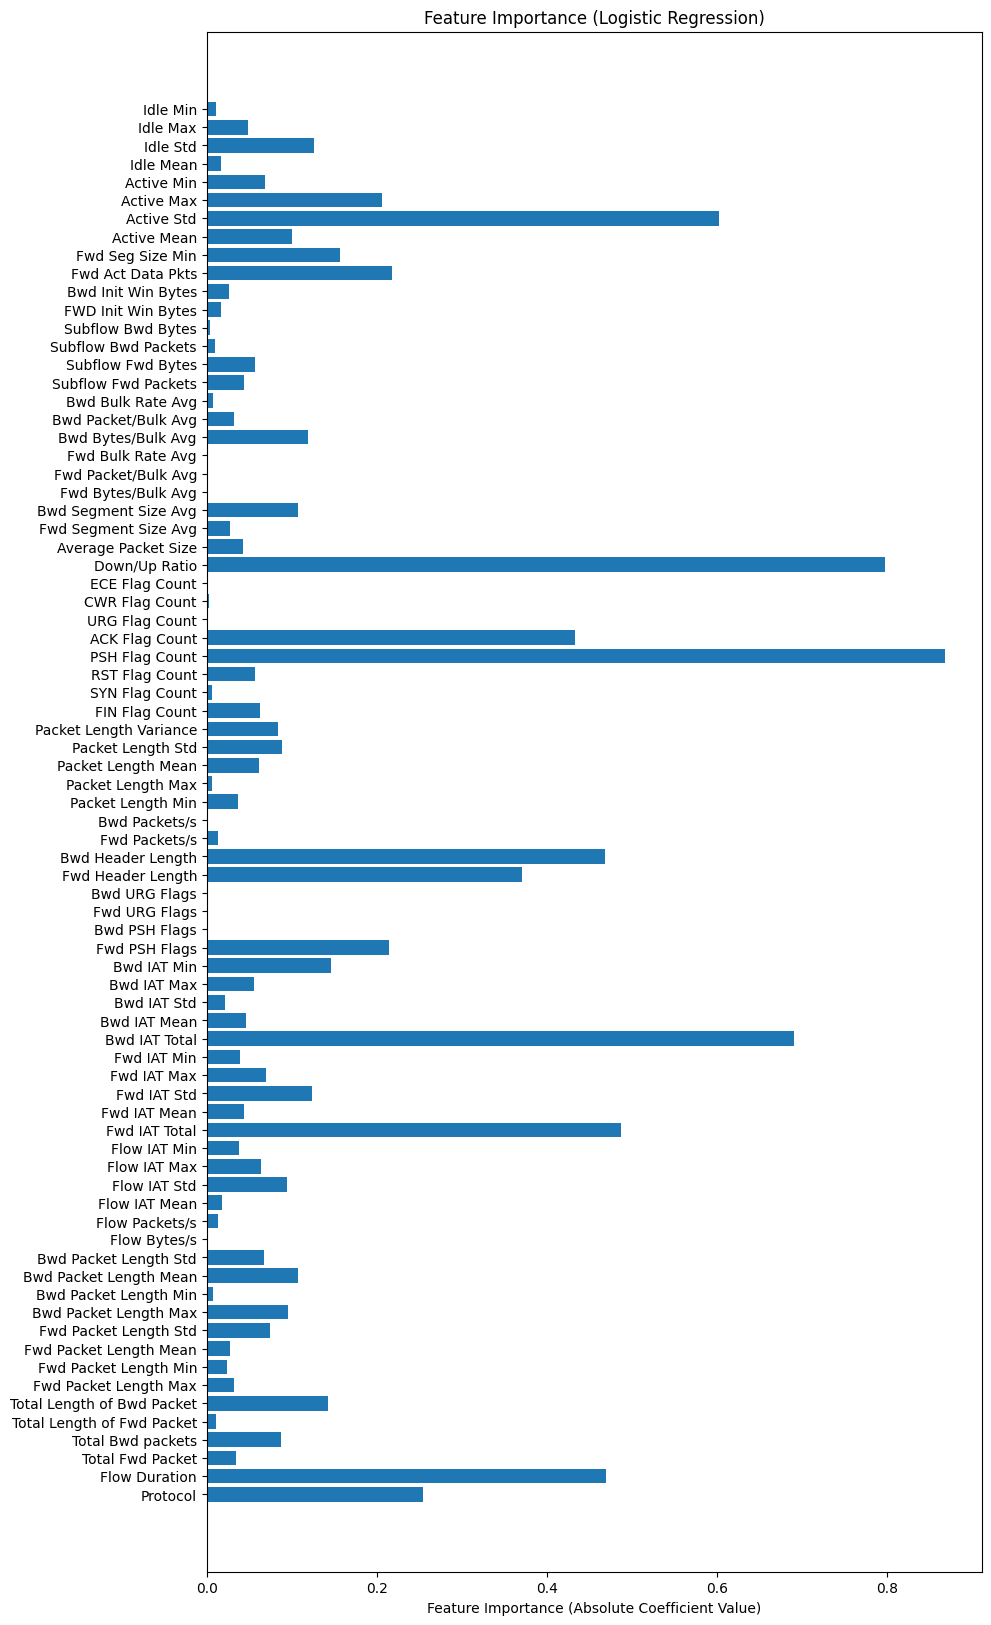

In [32]:
model_name = 'logreg1'  # Specify the model name

plt.figure(figsize=(10, 20))

# Access and process coefficients
importance_logreg = abs(models[model_name].coef_[0])  # Take absolute values
features = df.columns[:-1] # get the feature names.

# Visualization
plt.barh(features, importance_logreg)
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

In [33]:
hyperparameters = [
    {},  # Default configuration
    {'var_smoothing': 1e-12},  # Minimal smoothing to let the model capture fine-grained variance, maximizing capacity.
    {'var_smoothing': 1e-3},  # Higher smoothing for more stability, especially with small datasets.
]

# Loop to create and train 3 models
for i in range(3):
    # Create and train the model (Gaussian Naive Bayes)
    model = GaussianNB(**hyperparameters[i])
    model.fit(X_train, y_train)

    # Store the model in the dictionary with a unique name
    models[f'gnb{i+1}'] = model

# Print confirmation
print("Models trained and stored in the 'models' dictionary.")

Models trained and stored in the 'models' dictionary.


In [34]:
# Loop through the models gnb1, gnb2, gnb3, etc. (Gaussian Naive Bayes models)
for i in range(1, 4):
    model_name = f'gnb{i}'  # Changed from logreg to gnb
    
    # Predict using the model
    y_pred = models[model_name].predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    
    # Handle multi-class ROC AUC calculation
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(
            y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro'
        )
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1])
    
    # Store confusion matrix and classification report
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [35]:
# Evaluate gnb1
model_name = 'gnb1'  # Specify the model name
print("Model:", model_name)
print("Accuracy:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precision:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Confusion Matrix:\n", confusion_matrix_[model_name])
print("Classification Report:\n", classification_reports_[model_name])

Model: gnb1
Accuracy: 0.7847933005449953
F1 Score: 0.653806848908631
Precision: 0.7047315904653466
Recall: 0.7142989547080061
ROC AUC: 0.9587332720559104
Confusion Matrix:
 [[23  2  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  5  0 ... 18  0  0]
 [ 0  6  0 ...  0  0 20]
 [ 0  6  0 ...  0  0 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.21      1.00      0.34         6
           2       1.00      0.95      0.98        22
           3       1.00      0.97      0.99       697
           4       0.83      0.98      0.90       126
           5       0.92      0.48      0.63       785
           6       0.65      0.92      0.76       974
           7       0.99      0.22      0.36       946
           8       0.89      1.00      0.94       862
           9       1.00      1.00      1.00       880
          10       0.94      1.00      0.97       74

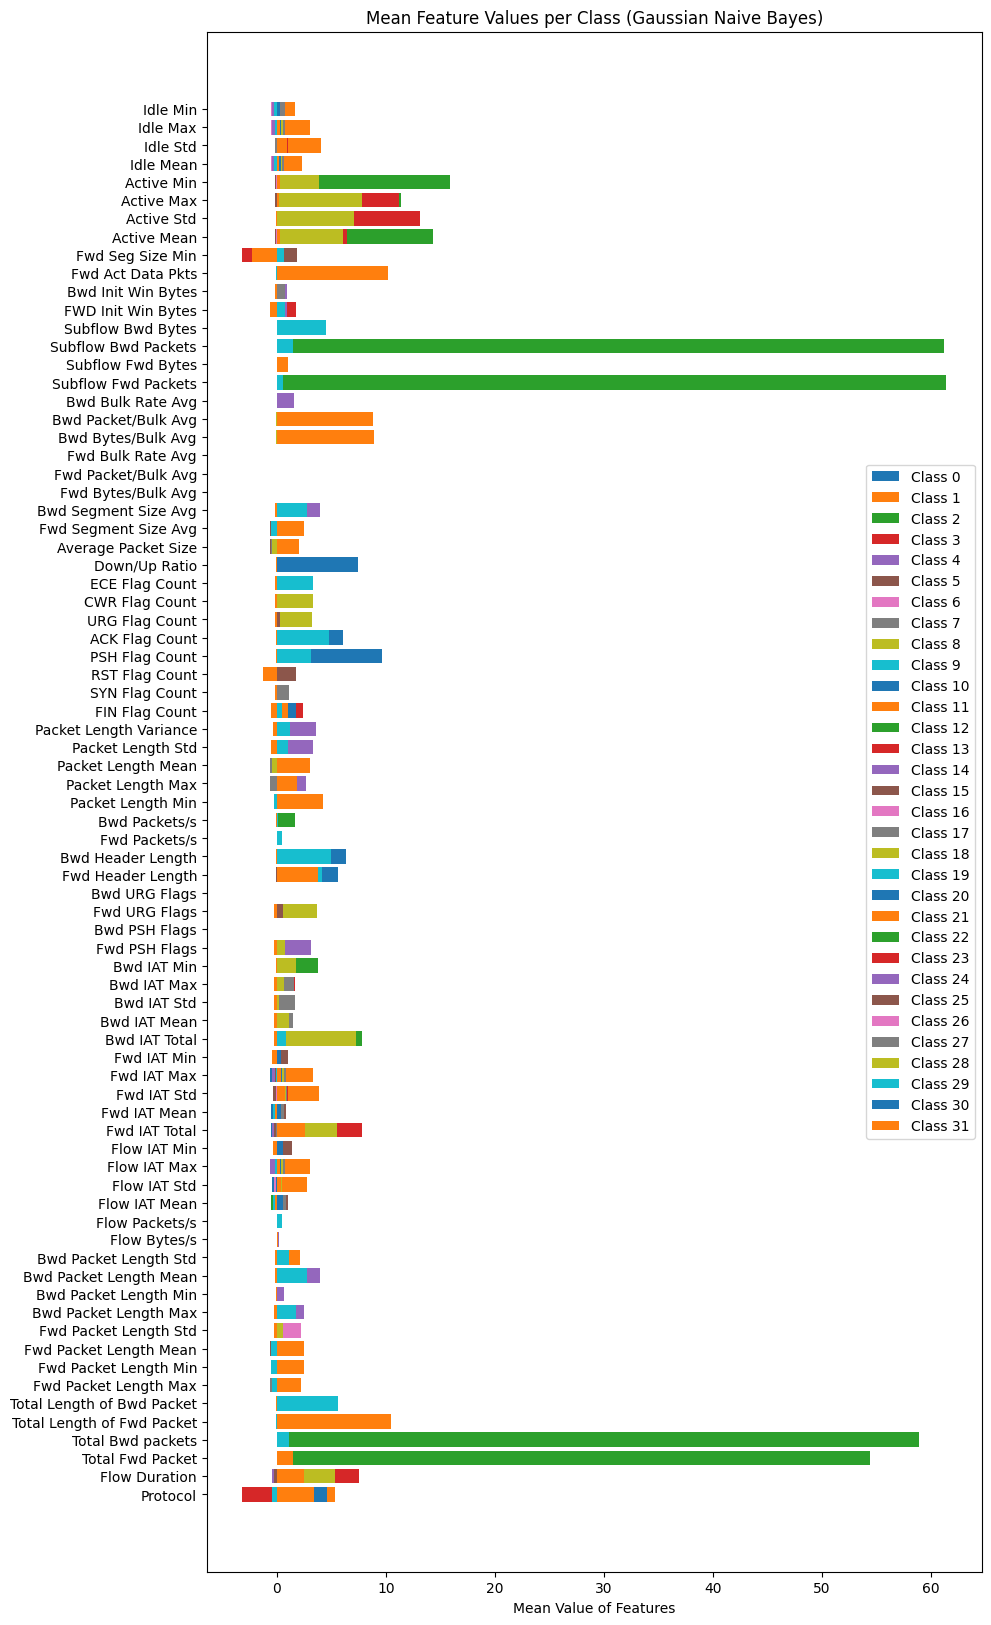

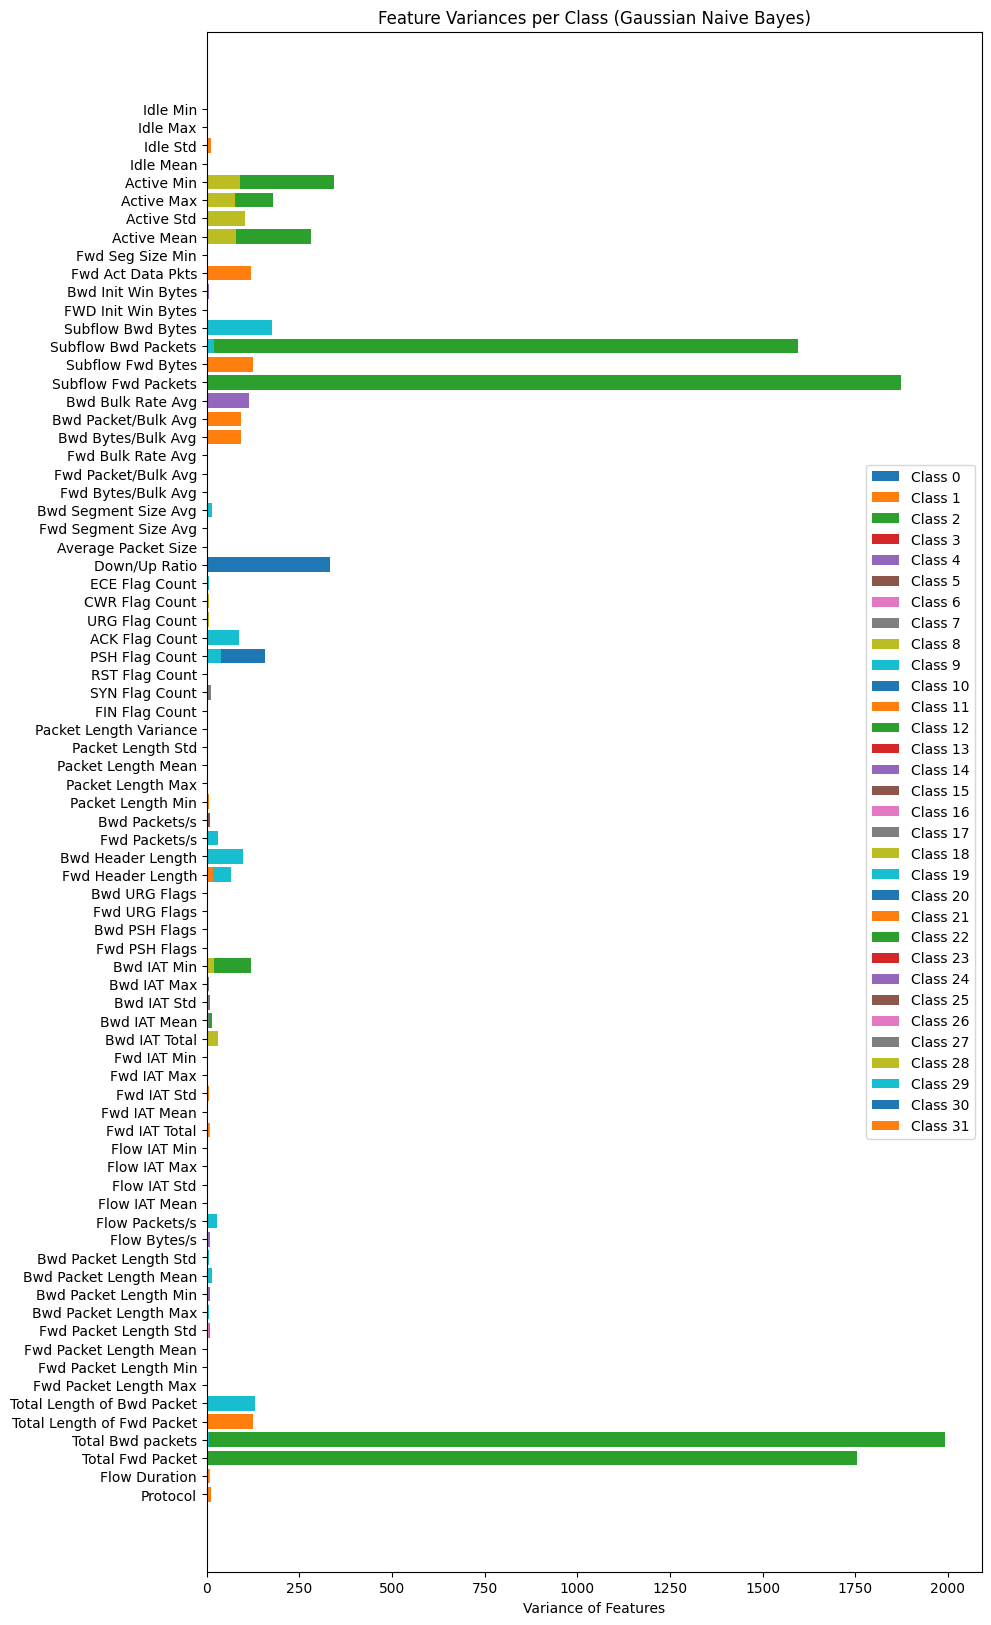

In [36]:
model_name = 'gnb1'  # Specify the model name
model = models[model_name]  # Access the GaussianNB model

# Get the mean and variance of each feature for each class
class_means = model.theta_  # Mean of each feature per class
class_variances = model.var_  # Variance of each feature per class
features = df.columns[:-1]  # Get the feature names (assuming the last column is the target)

# Number of classes and features
n_classes = class_means.shape[0]
n_features = class_means.shape[1]

# Plot the mean values of features for each class
plt.figure(figsize=(10, 20))

for i in range(n_classes):
    plt.barh(features, class_means[i], label=f'Class {i}')

plt.xlabel('Mean Value of Features')
plt.title('Mean Feature Values per Class (Gaussian Naive Bayes)')
plt.legend()
plt.show()

# Plot the variance values of features for each class
plt.figure(figsize=(10, 20))

for i in range(n_classes):
    plt.barh(features, class_variances[i], label=f'Class {i}')

plt.xlabel('Variance of Features')
plt.title('Feature Variances per Class (Gaussian Naive Bayes)')
plt.legend()
plt.show()

In [37]:
# Hyperparameters for XGBoost
hyperparameters = [
    {'n_estimators': 30, 'max_depth': 2, 'min_child_weight': 15, 'learning_rate': 0.3, 'subsample': 0.8}, # Lower number of estimators, deeper tree, moderate learning rate.
    {'n_estimators': 40, 'max_depth': 2, 'min_child_weight': 20, 'learning_rate': 0.25, 'subsample': 0.8}, # Slightly more trees and reduced learning rate for better generalization.
    {'n_estimators': 50, 'max_depth': 2, 'min_child_weight': 25, 'learning_rate': 0.2, 'subsample': 0.8}  # Increased trees, further reduced learning rate for more cautious learning.
]

# Loop to create and train 3 models
for i in range(3):
    # Create and train the model
    model = XGBClassifier(random_state=42, verbosity=0, **hyperparameters[i])
    model.fit(X_train, y_train)

    # Store the model in the dictionary with a unique name
    models[f'xgb{i+1}'] = model

# Print confirmation
print("Models trained and stored in the 'models' dictionary.")

Models trained and stored in the 'models' dictionary.


In [38]:
# Loop through the models xgb1, xgb2, xgb3, etc. (XGBoost models)
for i in range(1, 4):
    model_name = f'xgb{i}'  # Changed from gnb to xgb
    
    # Predict using the model
    y_pred = models[model_name].predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    
    # Handle multi-class ROC AUC calculation
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(
            y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro'
        )
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1])
    
    # Store confusion matrix and classification report
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)

In [39]:
# Evaluate xgb1
model_name = 'xgb1'  # Specify the model name
print("Model:", model_name)
print("Accuracy:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precision:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Confusion Matrix:\n", confusion_matrix_[model_name])
print("Classification Report:\n", classification_reports_[model_name])

Model: xgb1
Accuracy: 0.9750764322743586
F1 Score: 0.8682757780395696
Precision: 0.8613036029820493
Recall: 0.8957178613332524
ROC AUC: 0.9993449432243193
Confusion Matrix:
 [[34  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  1  0 ... 65  2  0]
 [ 0  1  0 ...  0 69  0]
 [ 0  0  0 ...  0  1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.67      1.00      0.80         6
           2       0.92      1.00      0.96        22
           3       1.00      0.99      1.00       697
           4       1.00      0.99      1.00       126
           5       0.95      0.99      0.97       785
           6       1.00      0.95      0.97       974
           7       0.97      0.97      0.97       946
           8       1.00      1.00      1.00       862
           9       1.00      1.00      1.00       880
          10       0.96      1.00      0.98       7